In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gradient.dumb_gradient import DumbGradientDescent 
from test_functions import f1, himmelblau, ackley

x =  [1.72726529 0.4545437 ] ;    f(x) =  2.1818181818696574


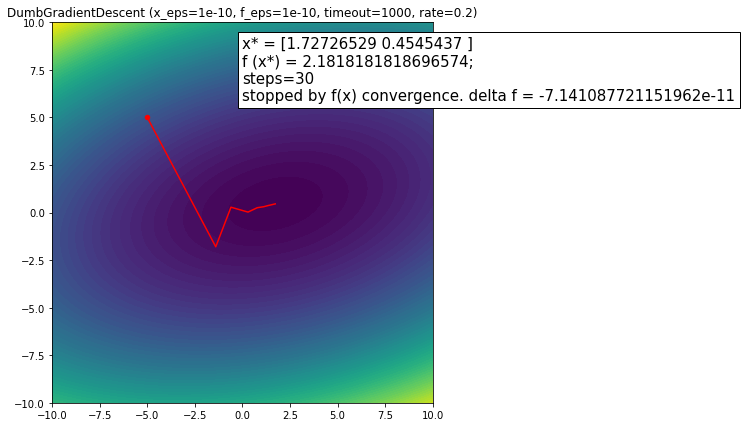

In [3]:
# Визначаємо метод оптимізації
method = DumbGradientDescent(timeout=1000, rate=0.2)
# Оптимізуємо. Зберігаємо результат. (див. файл dumb_gradient.py щоб подивитися, що містить result)
result = method.optimize(f1, f1.df, x_start=(-5,5))

# Беремо з результату послідовності {x_n}, {y_n}:
#   `result['x_history']` - це послідовність {(x_n, y_n)} - матриця (n, 2)
#   `result['x_history'].T` - це транспонування матриці - маємо матрицю (2, n)
# В `x_history` потрапить перший рядок, в `y_history` - другий рядок
x_history, y_history = result['x_history'].T

# створюємо двовимірний "лінійний простір" з двох одновимірних
# np.linspace(x0, x1, n) = { x0 + k * (x1-x0)/n | k = [0,n] } 
ls = np.linspace(-10,10,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

# gcf - get current figure - об'єкт для керування зображенням
# gca - get current axes - об'єкт для керування осями та графіком
fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-10,10) # межі по x
ax.set_ylim(-10,10) # межі по y
fig.set_size_inches((7,7)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f1([xx,yy]), levels=70) # Кольоровий графік f1(x,y) на області визначення ls x ls 
plt.scatter(x_history[0], y_history[0], c='r', s=20) # Позначити червоним кружечком початкову точку
plt.plot(x_history, y_history, c='r') # Побудувати траекторію спуску 

# Текст з описом результатів спуску
plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

# Додаткова детальна інформація текстом
# print(result)
print("x = ", result['x'], ";    f(x) = ", result['f'])


stopped by f(x) convergence. delta f = -9.498313247036094e-11
x =  [1.72725806 0.45454199] ;    f(x) =  2.1818181820184805
stopped by f(x) convergence. delta f = -7.141087721151962e-11
x =  [1.72726529 0.4545437 ] ;    f(x) =  2.1818181818696574


c:\Users\mkrooted\Uni\5-optimization\labs\lab1\test_functions.py:31: RuntimeWarning: overflow encountered in double_scalars
  return x**2 + 3*y**2 - x*y - 3*x - y + 5
c:\Users\mkrooted\Uni\5-optimization\labs\lab1\gradient\dumb_gradient.py:40: RuntimeWarning: invalid value encountered in double_scalars
  if (np.abs(new_f - last_f) < self.f_eps):
c:\Users\mkrooted\Uni\5-optimization\labs\lab1\test_functions.py:39: RuntimeWarning: overflow encountered in double_scalars
  return 6*y - x - 1
c:\Users\mkrooted\Uni\5-optimization\labs\lab1\test_functions.py:31: RuntimeWarning: invalid value encountered in double_scalars
  return x**2 + 3*y**2 - x*y - 3*x - y + 5
c:\Users\mkrooted\Uni\5-optimization\labs\lab1\gradient\dumb_gradient.py:30: RuntimeWarning: invalid value encountered in subtract
  new_x = last_x - df(last_x)*self.rate
c:\Users\mkrooted\Uni\5-optimization\labs\lab1\test_functions.py:31: RuntimeWarning: overflow encountered in double_scalars
  return x**2 + 3*y**2 - x*y - 3*x - y +

stopped by timeout
x =  [nan nan] ;    f(x) =  nan
stopped by timeout
x =  [nan nan] ;    f(x) =  nan


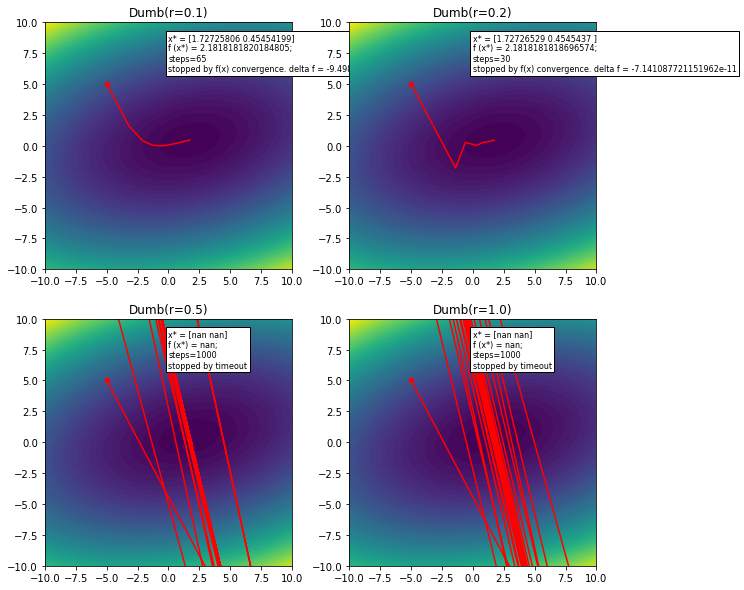

In [4]:
methods = {
    "Dumb(r=0.1)": DumbGradientDescent(timeout=1000, rate=0.1),
    "Dumb(r=0.2)": DumbGradientDescent(timeout=1000, rate=0.2),
    "Dumb(r=0.5)": DumbGradientDescent(timeout=1000, rate=0.5),
    "Dumb(r=1.0)": DumbGradientDescent(timeout=1000, rate=1),
}

fig, axs = plt.subplots(2,2)
axs = np.array(axs).flat
fig.set_size_inches((10,10)) # розмір зображення в "дюймах"

for (title, method), ax in zip(methods.items(), axs):
    result = method.optimize(f1, f1.df, x_start=(-5,5))

    x_history, y_history = result['x_history'].T

    ls = np.linspace(-10,10,200)
    xx, yy = np.meshgrid(ls, ls, sparse=True)

    ax.set_aspect(1.0)
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_title(str(title)) # додати заголовок

    # Побудова графіків
    ax.contourf(ls, ls, f1([xx,yy]), levels=70) # Кольоровий графік f1(x,y) на області визначення ls x ls 
    ax.scatter(x_history[0], y_history[0], c='r', s=20) # Позначити червоним кружечком початкову точку
    ax.plot(x_history, y_history, c='r') # Побудувати траекторію спуску 

    # Текст з описом результатів спуску
    ax.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
        size=8, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

    # Додаткова детальна інформація текстом
    print(result['message'])
    print("x = ", result['x'], ";    f(x) = ", result['f'])


AAA: df(0) = [-46. -38.]
stopped by f(x) convergence. delta f = -8.776149456598697e-11
x =  [2.99999889 2.00000268] ;    f(x) =  1.0805300298479847e-10
AAA: df(0) = [-46. -38.]
stopped by timeout
x =  [2.68324994 1.88607528] ;    f(x) =  4.240552462228008
AAA: df(0) = [-46. -38.]
stopped by x convergence. delta x = 0.0
x =  [ 3.93984816e+16 -1.51633649e+03] ;    f(x) =  2.4094501095529337e+66
AAA: df(0) = [-46. -38.]
stopped by x convergence. delta x = 0.0
x =  [-1.11426662e+14 -8.31840253e+12] ;    f(x) =  1.5415938766633553e+56


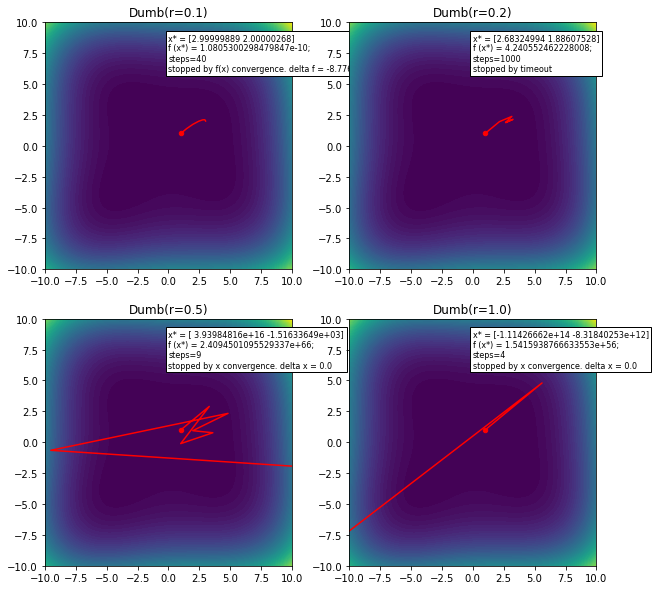

In [5]:
methods = {
    "Dumb(r=0.1)": DumbGradientDescent(timeout=1000, rate=0.01),
    "Dumb(r=0.2)": DumbGradientDescent(timeout=1000, rate=0.025),
    "Dumb(r=0.5)": DumbGradientDescent(timeout=1000, rate=0.05),
    "Dumb(r=1.0)": DumbGradientDescent(timeout=1000, rate=0.1),
}

fig, axs = plt.subplots(2,2)
axs = np.array(axs).flat
fig.set_size_inches((10,10)) # розмір зображення в "дюймах"

def df(x):
    d = np.zeros_like(x)
    for i in range(d.size):
        d[i] = himmelblau.auto_di(i,x,dx_i=1e-5)
    return d

for (title, method), ax in zip(methods.items(), axs):
    result = method.optimize(himmelblau, df, x_start=(1.0,1.0))

    print(f"AAA: df(0) = {df([1.0,1.0])}")

    x_history, y_history = result['x_history'].T

    ls = np.linspace(-10,10,200)
    xx, yy = np.meshgrid(ls, ls, sparse=True)

    ax.set_aspect(1.0)
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_title(str(title)) # додати заголовок

    # Побудова графіків
    ax.contourf(ls, ls, himmelblau([xx,yy]), levels=70) # Кольоровий графік f1(x,y) на області визначення ls x ls 
    ax.scatter(x_history[0], y_history[0], c='r', s=20) # Позначити червоним кружечком початкову точку
    ax.plot(x_history, y_history, c='r') # Побудувати траекторію спуску 

    # Текст з описом результатів спуску
    ax.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
        size=8, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

    # Додаткова детальна інформація текстом
    print(result['message'])
    print("x = ", result['x'], ";    f(x) = ", result['f'])


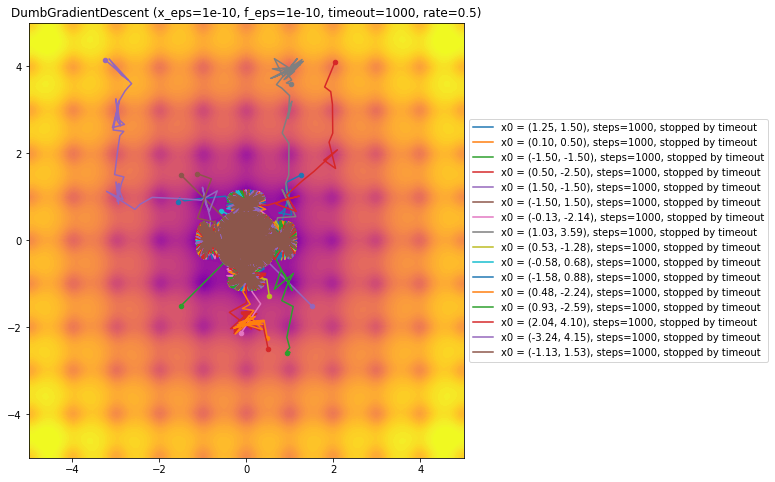

In [8]:
f = ackley.f
df = ackley.auto_d

# my_cmap = cm.coolwarm
ls = np.linspace(-5,5,200)
xx, yy = np.meshgrid(ls, ls, sparse=True)

fig = plt.gcf()
ax = plt.gca()

# Підготовка зображення
ax.set_aspect(1.0) # відношення сторін 1:1
ax.set_xlim(-5,5) # межі по x
ax.set_ylim(-5,5) # межі по y
fig.set_size_inches((8,8)) # розмір зображення в "дюймах"
ax.set_title(str(method)) # додати заголовок

# Побудова графіків
plt.contourf(ls, ls, f([xx,yy]), levels=100, vmin=0, vmax=14, cmap='plasma') # Кольоровий графік f1(x,y) на області визначення ls x ls 

method = DumbGradientDescent(timeout=1000, rate=0.1)

x0s = [(1.25,1.5), (0.1,0.5), (-1.5,-1.5), (0.5,-2.5), (1.5,-1.5), (-1.5,1.5)]
x0s+=zip(np.random.choice(ls, 10), np.random.choice(ls, 10))

for x0 in x0s:
    result = method.optimize(f, df, x_start=x0)

    x_history, y_history = result['x_history'].T


    plt.scatter(x_history[0], y_history[0], s=20) # Позначити червоним кружечком початкову точку
    plt.plot(x_history, y_history, label=f'x0 = ({x0[0]:.2f}, {x0[1]:.2f}), steps={result["steps"]}, {result["message"]}') # Побудувати траекторію спуску 


    # Текст з описом результатів спуску
    # plt.text(0, 7.5, f"x* = {result['x']}\nf (x*) = {result['f']};\nsteps={result['steps']}\n{result['message']}", 
    #     size=15, ha='left', va='center', bbox=dict(boxstyle='square', fc='white'))

    # Додаткова детальна інформація текстом
    # print(result)
    # print("x = ", result['x'], ";    f(x) = ", result['f'])
    # print(f"df(1,1) = {df([1,1])}")

ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
